### Preprocessing

In [596]:
# import relevant statistical packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [587]:
# import data visualisation packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [541]:
# import Carseats data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Carseats.csv"
df = pd.read_csv(url).drop('Unnamed: 0', axis=1)
df.Sales = df.Sales.map(lambda x: 0 if x<=8 else 1)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})

In [554]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


### Performing decision tree classification

In [708]:
X = df.drop(['Sales'], axis = 1)
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 0)

In [709]:
tree_carseats = DecisionTreeClassifier(max_depth = 8)
tree_carseats.fit(X_train, y_train)
tree_carseats.score(X_train, y_train)

0.995

**This suggests that the training accuracy of the model is 99.5%, which is excellent! However, the true test of the model's predictive ability lies in the test set.**

In [699]:
tree_pred = tree_carseats.predict(X_test)
class_mat = pd.DataFrame(confusion_matrix(y_test, tree_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat)

      No  Yes
No   100   35
Yes   18   47


In [700]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       118
           1       0.72      0.57      0.64        82

   micro avg       0.73      0.73      0.73       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.73      0.73       200



**This suggests that the model predicts 74% of correct predictions in the test set.**

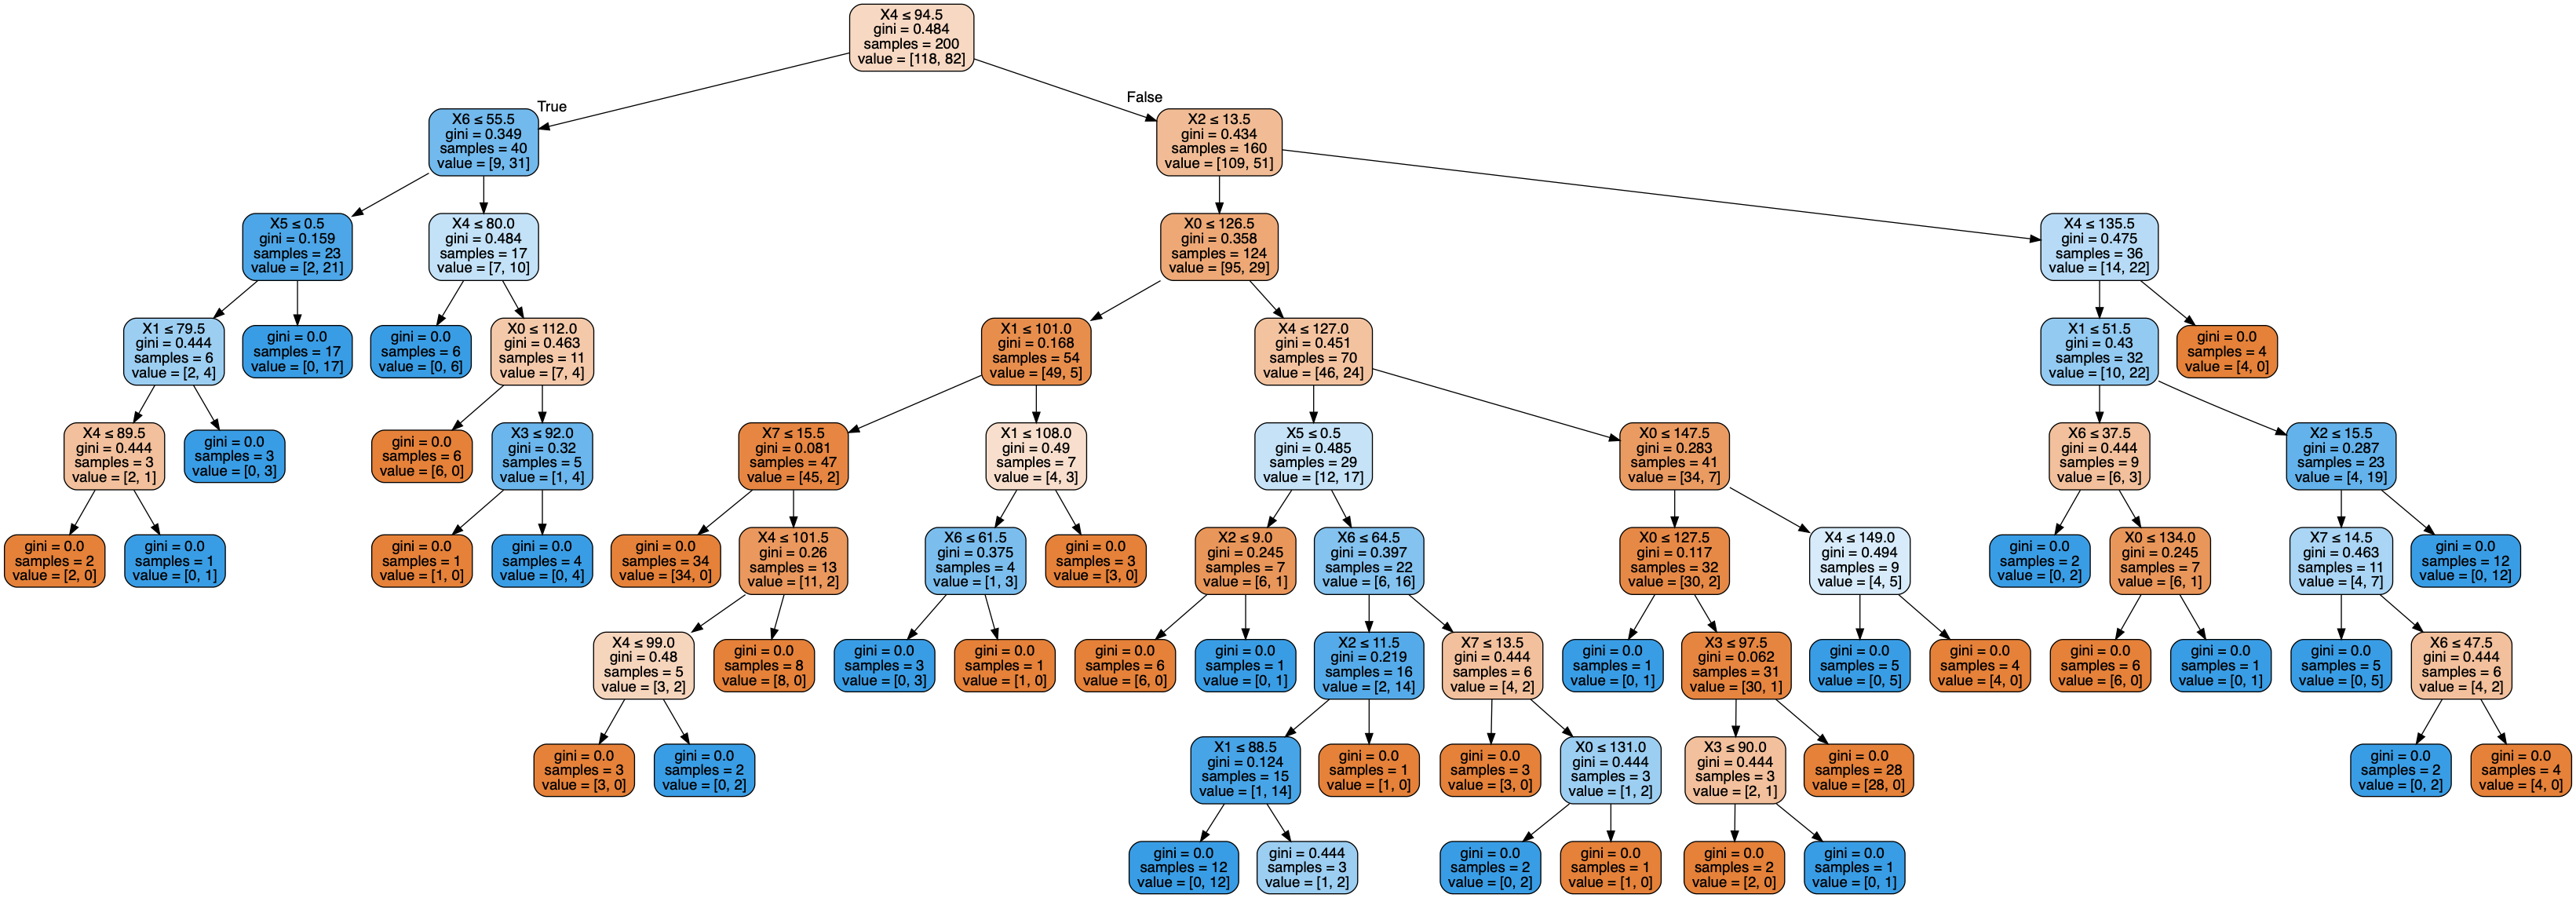

In [701]:
dot_data = StringIO()

export_graphviz(tree_carseats, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Pruning the decision tree

In [710]:
SCORES = []
max_leafs_arr = range(2, 50)
for max_leafs in max_leafs_arr:
    regressionTree = DecisionTreeClassifier(max_leaf_nodes=max_leafs)
    sc = cross_val_score(regressionTree, X, y, cv=10, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(scores)

The best tree has 15 leafs.


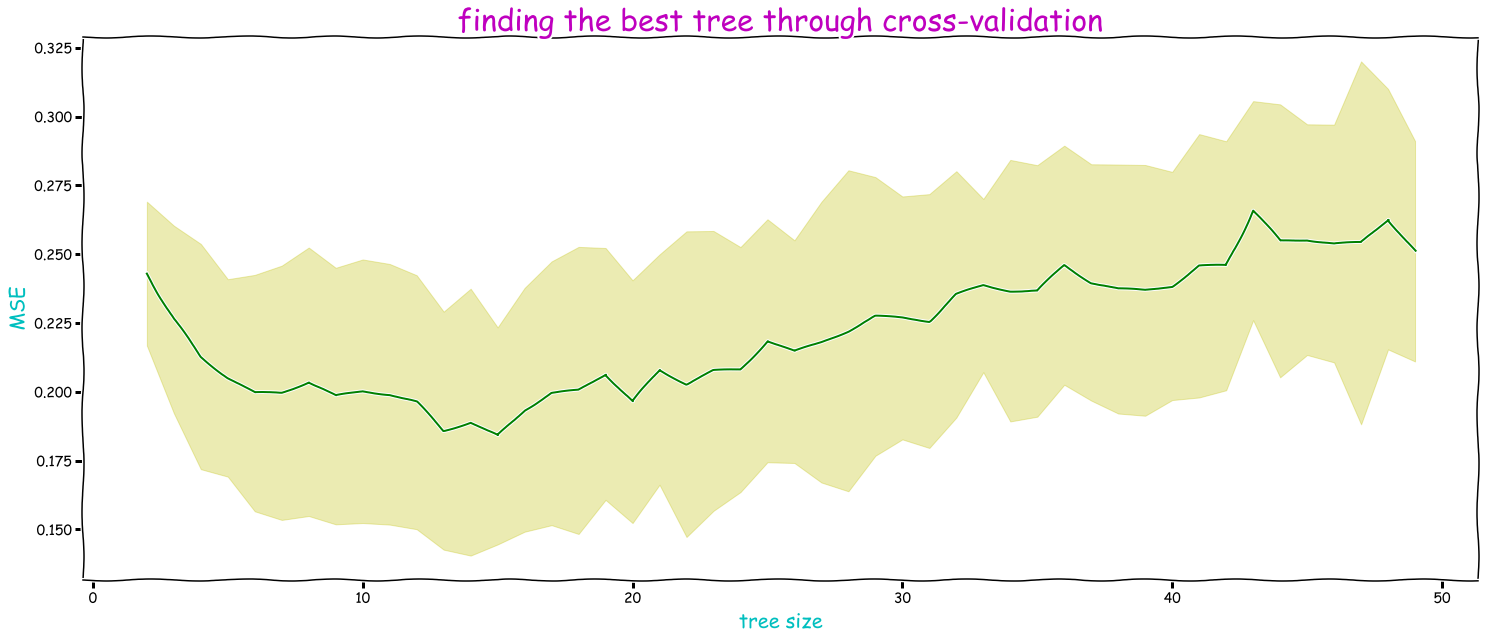

In [711]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(max_leafs_arr, scores[:,0], 'g')
plt.fill_between(max_leafs_arr, scores[:,0]+scores[:,1], scores[:,0]-scores[:,1], alpha=0.3, color='y')
plt.xlabel('tree size', fontsize=20, color='c')
plt.ylabel('MSE', fontsize=20, color='c')
plt.title('finding the best tree through cross-validation', fontsize=30, color='m')
best_min_leafs = max_leafs_arr[np.argmin(scores[:,0])]
print(f"The best tree has {best_min_leafs} leafs.")

In [712]:
tree_carseats_1 = DecisionTreeClassifier(max_depth = 5)
tree_carseats_1.fit(X_train, y_train)
tree_carseats_1.score(X_train, y_train)

0.895

In [713]:
tree_pred_1 = tree_carseats_1.predict(X_test)
class_mat_1 = pd.DataFrame(confusion_matrix(y_test, tree_pred_1).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat_1)

     No  Yes
No   87   29
Yes  31   53


In [714]:
print(classification_report(y_test, tree_pred_1))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       118
           1       0.63      0.65      0.64        82

   micro avg       0.70      0.70      0.70       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200



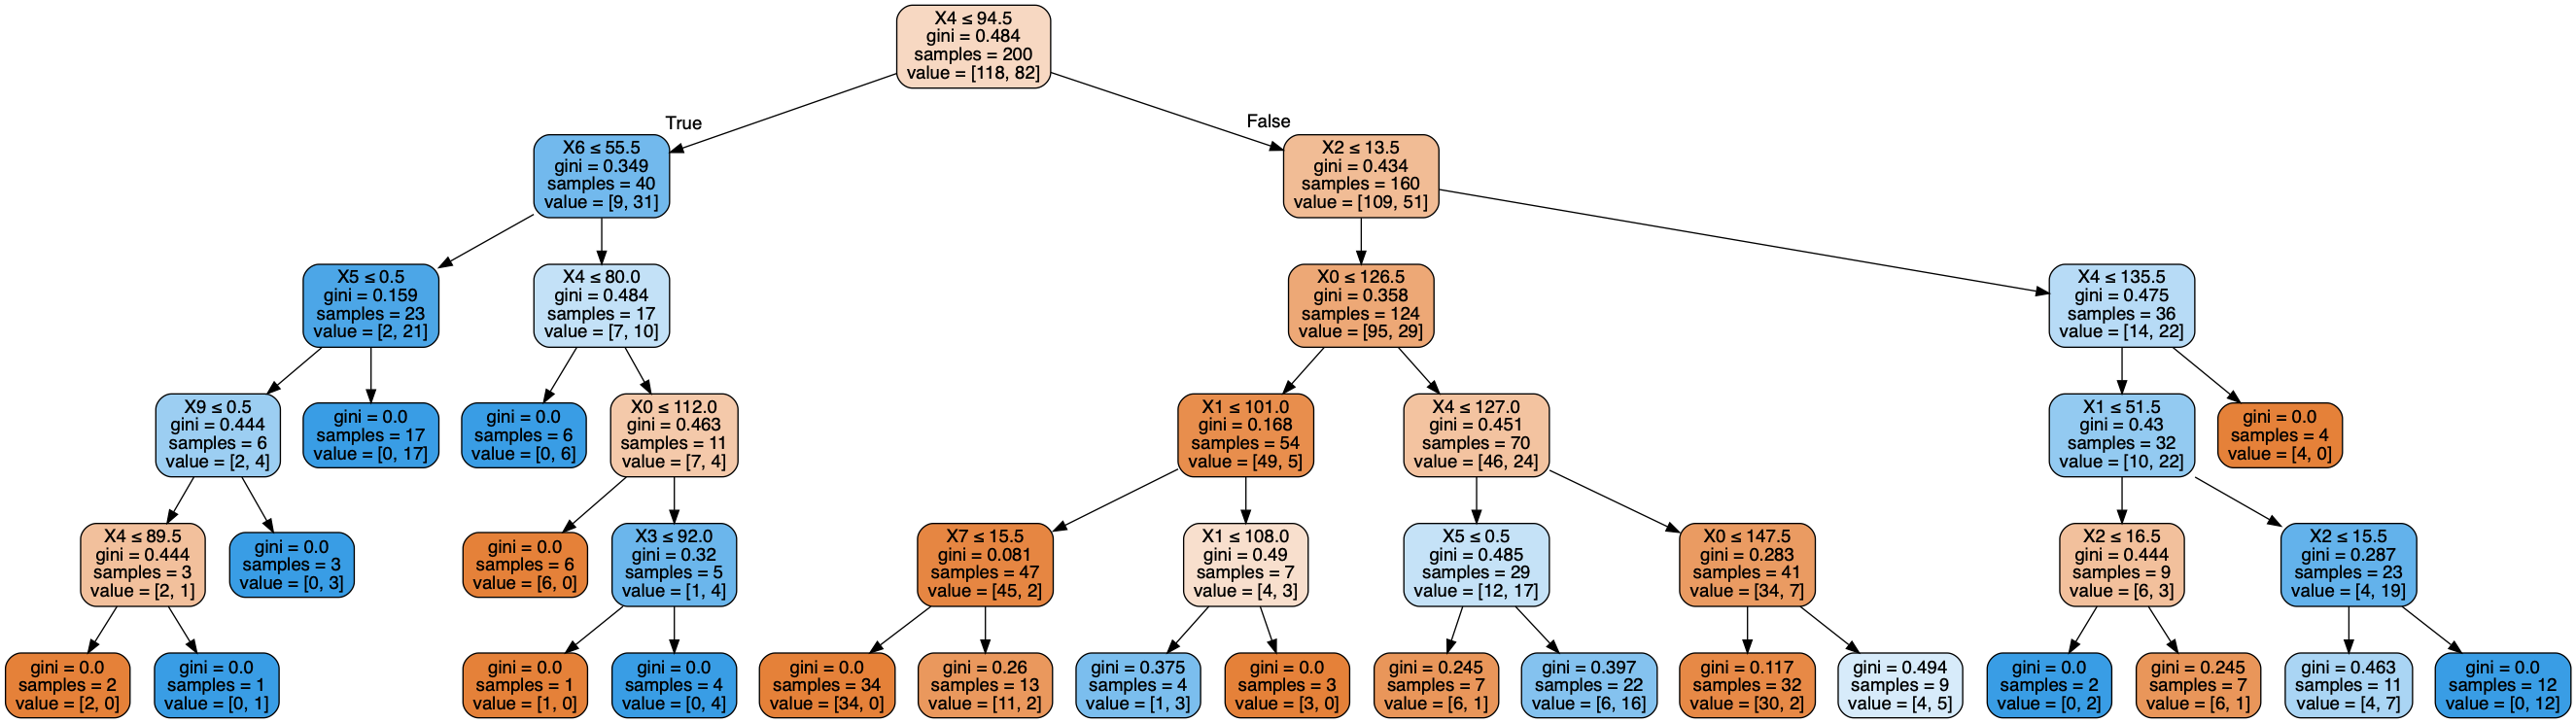

In [715]:
dot_data_1 = StringIO()

export_graphviz(tree_carseats_1, out_file=dot_data_1, filled=True, rounded=True, special_characters=True)

graph_1 = pydotplus.graph_from_dot_data(dot_data_1.getvalue())  
Image(graph_1.create_png())

**I can achieve the closest to 15 leaves when depth = 5. At 15 leaves with pruning, the predictive ability of the decision tree increases to 75% (a minor increase but succesfully demonstrates how pruning via. cross-validation can be useful).**